In [20]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import copy
import scipy
from sko.GA import GA

In [31]:
N = 6
data = np.array(pd.read_csv('dataProcess.csv',index_col = 0))
train_time = 504               #设置滑动窗口
start = 1
hour = 100   
concept = data.shape[1]

data_test = data[start+train_time:start+train_time+hour,:]     #hour做测试

In [41]:
def drawPre(title,preData,realData,dataNum=10):
    plt.title(title)
    plt.plot(range(dataNum), preData, color='green', label='predict');
    plt.plot(range(dataNum), realData, color='red', label='real');
    plt.legend();
    plt.xlabel('time');
    plt.ylabel('value');
    plt.show();

In [35]:
def rshape(X,N):
    W = np.zeros((N,N))  
    #lmd = temp[-N:]
    num = 0
    for i in range(N):
        for j in range(N):
            if i is not j:
                W[i,j] = X[num]
                num = num + 1
    return W

def f(x):
    y = 1/(1+np.exp(-x))
    return y

def cala(W,data,data_front,time):
    A2 = [0] * time
    A2[0] = f(np.dot(data_front,W))
    for i in range(1,time):
        A2[i] = f(np.dot(data[i-1], W))
        #A2[i + 1] = f(temp)
    return A2

def cala1(W,data):
    A2 = np.zeros(data.shape[0])
    for j in range(data.shape[0]):
        temp = np.dot(W[j],data)
        A2[j] = f(temp)
    return A2

#%%
def errorLp(X):
    W = rshape(X,N)
    A1 = cala(W,data_train,data_front,train_time)                 #更新后的矩阵
    dist = np.linalg.norm(A1 - data_train)/data_train.shape[0]        #预测矩阵与真实矩阵的欧式距离
    return dist

In [48]:
#%% 
#def gaTrain():
data_pre = np.zeros((data_test.shape[0],data_test.shape[1]))
for i in range(0,hour):
    data_train = data[i+start:i+train_time+start,:]
    data_front = data[i+start-1]
    data_real = data[i+start+train_time-1,:]
    ga = GA(func=errorLp,n_dim=6*5 ,size_pop=10 , max_iter=600,lb=[-1]*5*6,ub=[1]*5*6,precision=1e-7)
    X,Y=ga.run()
    #print(X)
    W = rshape(X,N)
    data_pre[i] = cala1(W,data_real)
    #return data_pre

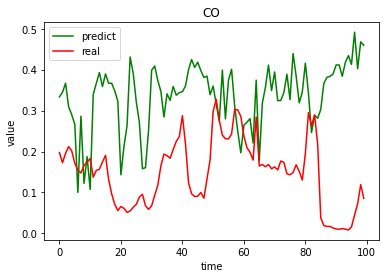

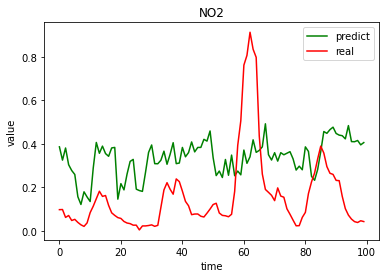

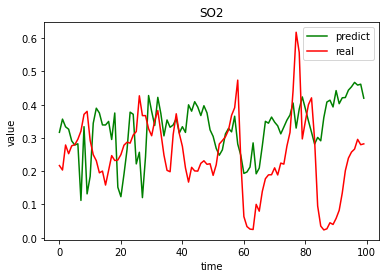

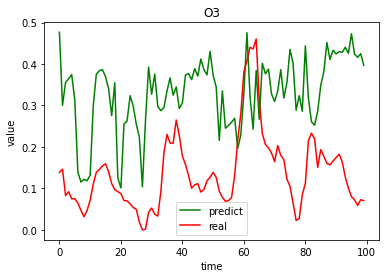

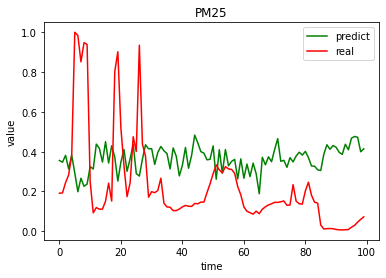

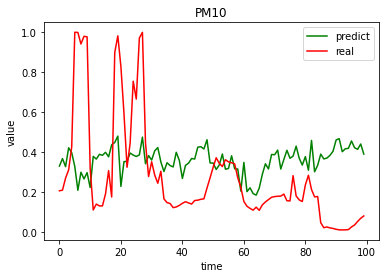

In [51]:
drawPre("CO",data_pre[:,0],data_test[:,0],dataNum = data_test.shape[0])
drawPre("NO2",data_pre[:,1],data_test[:,1],dataNum = data_test.shape[0])
drawPre("SO2",data_pre[:,2],data_test[:,2],dataNum = data_test.shape[0])
drawPre("O3",data_pre[:,3],data_test[:,3],dataNum = data_test.shape[0])
drawPre("PM25",data_pre[:,4],data_test[:,4],dataNum = data_test.shape[0])
drawPre("PM10",data_pre[:,5],data_test[:,5],dataNum = data_test.shape[0])